In [ ]:
#Importing necessary libraries
import numpy as np
import datetime
import scipy.stats as si
import numpy as np
import scipy.stats as si
import yfinance as yf

from random import gauss
from math import exp,sqrt

import matplotlib.pyplot as plt

In [ ]:
#STOCK DETAILS

#S: Current Stock Price
#K: Strike price
#T: Time to maimport matplotlib.pyplot as pltturity in Years
#r: Risk Free interest rate
#sigma: Volatility of underlying asset

X=[]
Y1=[]
Y2=[]

s = yf.Ticker('AZN')
opt = s.option_chain('2024-01-19')
call = opt.calls
put = opt.puts
S = s.history(period = "max")['Close'].iloc[-1]
# # S=184.92
Tq = (datetime.date(2024,1,19) - datetime.date(2023,6,19)).days
T = Tq/365.0
print(S, T)
# print(dir(opt))
# print(opt.calls)
# S

74.13999938964844 0.5863013698630137


In [ ]:
#FUNCTION FOR BLACK-SCHOLES METHOD

def black_scholes_calc(S, K, T, r, sigma, option = 'call'):

    d1 = (np.log(S / K) + (r + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    d2 = (np.log(S / K) + (r - 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))

    if option == 'call':
        result = (S * si.norm.cdf(d1, 0.0, 1.0) - K * np.exp(-r * T) * si.norm.cdf(d2, 0.0, 1.0))
    if option == 'put':
        result = (K * np.exp(-r * T) * si.norm.cdf(-d2, 0.0, 1.0) - S * si.norm.cdf(-d1, 0.0, 1.0))

    return result

In [ ]:
print('Call Options : ')
print (' ')
for i in range(len(call)):
    v = call.iloc[i]['impliedVolatility']
    r = 0.0375
    K = call.iloc[i]['strike']
    X.append(K)
    print ('Strike Price: %.1f' % K)
    y1=black_scholes_calc(S, K, T, r, v)
    Y1.append(y1)
    print ('Price of option: %.4f' % y1)
    print (' ')

Call Options : 
 
Strike Price: 30.0
Price of option: 46.3303
 
Strike Price: 32.5
Price of option: 42.3468
 
Strike Price: 35.0
Price of option: 40.6493
 
Strike Price: 37.5
Price of option: 37.4555
 
Strike Price: 40.0
Price of option: 36.0700
 
Strike Price: 42.5
Price of option: 32.5642
 
Strike Price: 45.0
Price of option: 31.9789
 
Strike Price: 47.5
Price of option: 27.6730
 
Strike Price: 50.0
Price of option: 26.7318
 
Strike Price: 52.5
Price of option: 24.6907
 
Strike Price: 55.0
Price of option: 22.3184
 
Strike Price: 57.5
Price of option: 20.7412
 
Strike Price: 60.0
Price of option: 17.6579
 
Strike Price: 62.5
Price of option: 15.4598
 
Strike Price: 65.0
Price of option: 13.3955
 
Strike Price: 67.5
Price of option: 11.3712
 
Strike Price: 70.0
Price of option: 9.5285
 
Strike Price: 72.5
Price of option: 7.8681
 
Strike Price: 75.0
Price of option: 6.1983
 
Strike Price: 77.5
Price of option: 4.8607
 
Strike Price: 80.0
Price of option: 3.7169
 
Strike Price: 82.5
Pr

In [ ]:
Y1_put = []
print('Put Options : ')
print (' ')
for i in range(len(put)):
    v = put.iloc[i]['impliedVolatility']
    r = 0.0375
    K = put.iloc[i]['strike']
    # X.append(K)
    print ('Strike Price: %.1f' % K)
    y1=black_scholes_calc(S, K, T, r, v)
    Y1_put.append(y1)
    print ('Price of option: %.4f' % y1)
    print (' ')

Put Options : 
 
Strike Price: 27.5
Price of option: 47.2849
 
Strike Price: 30.0
Price of option: 44.8555
 
Strike Price: 32.5
Price of option: 42.4397
 
Strike Price: 35.0
Price of option: 40.1789
 
Strike Price: 37.5
Price of option: 37.7385
 
Strike Price: 40.0
Price of option: 35.1496
 
Strike Price: 42.5
Price of option: 33.0275
 
Strike Price: 45.0
Price of option: 30.8568
 
Strike Price: 47.5
Price of option: 27.9246
 
Strike Price: 50.0
Price of option: 25.5498
 
Strike Price: 52.5
Price of option: 23.1924
 
Strike Price: 55.0
Price of option: 20.7797
 
Strike Price: 57.5
Price of option: 18.4854
 
Strike Price: 60.0
Price of option: 16.1790
 
Strike Price: 62.5
Price of option: 13.9901
 
Strike Price: 65.0
Price of option: 11.8583
 
Strike Price: 67.5
Price of option: 9.8436
 
Strike Price: 70.0
Price of option: 7.9287
 
Strike Price: 72.5
Price of option: 6.1706
 
Strike Price: 75.0
Price of option: 4.7078
 
Strike Price: 77.5
Price of option: 3.1750
 
Strike Price: 80.0
Pri

In [ ]:
# X=X[1:]

In [ ]:
def BTM_call_option(S,K,T,r,v,nts):
        """Calculates price for call option according to the Binomial formula."""
        # Delta t, up and down factors
        dT = T / nts
        u = np.exp(v * np.sqrt(dT))
        d = 1.0 / u

        # Price vector initialization
        V = np.zeros(nts + 1)

        # Underlying asset prices at different time points
        S_T = np.array( [(S * u**j * d**(nts - j)) for j in range(nts + 1)])

        a = np.exp(r * dT)      # risk free compounded return
        p = (a - d) / (u - d)   # risk neutral up probability
        q = 1.0 - p             # risk neutral down probability

        V[:] = np.maximum(S_T - K, 0.0)

        # Overriding option price
        for i in range(nts - 1, -1, -1):
            V[:-1] = np.exp(-r * dT) * (p * V[1:] + q * V[:-1])

        return V[0]

In [ ]:
Y3 = []
print ('Call Options : ')
print (' ')
for i in range(len(call)):
    v = call.iloc[i]['impliedVolatility']
    r = 0.0375
    K = call.iloc[i]['strike']
    print ('Strike Price: %.1f' % K)
    y3=BTM_call_option(S, K, T, r, v, Tq)
    Y3.append(y3)
    print ('Price of option: %.4f' % y3)
    print (' ')

Call Options : 
 
Strike Price: 30.0
Price of option: 46.3260
 
Strike Price: 32.5
Price of option: nan
 
Strike Price: 35.0
Price of option: 40.6500
 
Strike Price: 37.5
Price of option: nan
 
Strike Price: 40.0
Price of option: 36.0720
 
Strike Price: 42.5
Price of option: nan
 
Strike Price: 45.0
Price of option: 31.9821
 
Strike Price: 47.5
Price of option: nan
 
Strike Price: 50.0
Price of option: 26.7341
 
Strike Price: 52.5
Price of option: 24.6903
 
Strike Price: 55.0
Price of option: 22.3229
 
Strike Price: 57.5
Price of option: 20.7429
 
Strike Price: 60.0
Price of option: 17.6625
 
Strike Price: 62.5
Price of option: 15.4639
 
Strike Price: 65.0
Price of option: 13.3960
 
Strike Price: 67.5
Price of option: 11.3678
 
Strike Price: 70.0
Price of option: 9.5268
 
Strike Price: 72.5
Price of option: 7.8709
 
Strike Price: 75.0
Price of option: 6.2046
 
Strike Price: 77.5
Price of option: 4.8646
 
Strike Price: 80.0
Price of option: 3.7125
 
Strike Price: 82.5
Price of option: 2

<ipython-input-76-660cdb7e40cc>:22: RuntimeWarning: overflow encountered in multiply
  V[:-1] = np.exp(-r * dT) * (p * V[1:] + q * V[:-1])
<ipython-input-76-660cdb7e40cc>:22: RuntimeWarning: overflow encountered in add
  V[:-1] = np.exp(-r * dT) * (p * V[1:] + q * V[:-1])
<ipython-input-76-660cdb7e40cc>:22: RuntimeWarning: invalid value encountered in add
  V[:-1] = np.exp(-r * dT) * (p * V[1:] + q * V[:-1])


In [ ]:
def BTM_put_option(S,K,T,r,v,nts):
        """Calculates price for call option according to the Binomial formula."""
        # Delta t, up and down factors
        dT = T / nts
        u = np.exp(v * np.sqrt(dT))
        d = 1.0 / u

        # Price vector initialization
        V = np.zeros(nts + 1)

        # Underlying asset prices at different time points
        S_T = np.array( [(S * u**j * d**(nts - j)) for j in range(nts + 1)])

        a = np.exp(r * dT)      # risk free compounded return
        p = (a - d) / (u - d)   # risk neutral up probability
        q = 1.0 - p             # risk neutral down probability

        V[:] = np.maximum(S_T - K, 0.0)

        # Overriding option price
        for i in range(nts - 1, -1, -1):
            V[:-1] = np.exp(-r * dT) * (p * V[1:] + q * V[:-1])

        return V[0]

In [ ]:
Y3_put = []
print ('Call Options : ')
print (' ')
for i in range(len(put)):
    v = put.iloc[i]['impliedVolatility']
    r = 0.0375
    K = put.iloc[i]['strike']
    print ('Strike Price: %.1f' % K)
    y3=BTM_put_option(S, K, T, r, v, Tq)
    Y3_put.append(y3)
    print ('Price of option: %.4f' % y3)
    print (' ')

Call Options : 
 
Strike Price: 27.5
Price of option: 47.2844
 
Strike Price: 30.0
Price of option: 44.8551
 
Strike Price: 32.5
Price of option: 42.4393
 
Strike Price: 35.0
Price of option: 40.1754
 
Strike Price: 37.5
Price of option: 37.7375
 
Strike Price: 40.0
Price of option: 35.1486
 
Strike Price: 42.5
Price of option: 33.0267
 
Strike Price: 45.0
Price of option: 30.8536
 
Strike Price: 47.5
Price of option: 27.9236
 
Strike Price: 50.0
Price of option: 25.5499
 
Strike Price: 52.5
Price of option: 23.1932
 
Strike Price: 55.0
Price of option: 20.7773
 
Strike Price: 57.5
Price of option: 18.4844
 
Strike Price: 60.0
Price of option: 16.1773
 
Strike Price: 62.5
Price of option: 13.9921
 
Strike Price: 65.0
Price of option: 11.8614
 
Strike Price: 67.5
Price of option: 9.8406
 
Strike Price: 70.0
Price of option: 7.9327
 
Strike Price: 72.5
Price of option: 6.1685
 
Strike Price: 75.0
Price of option: 4.7125
 
Strike Price: 77.5
Price of option: 3.1790
 
Strike Price: 80.0
Pr

In [ ]:
#FUNCTION FOR MONTE CARLO METHOD

def monterCarloPriceGenerator(sP, vol, rfi, time_diff):
    price = sP*exp((rfi - 0.5*vol**2)*time_diff+ vol*sqrt(time_diff)*gauss(0,1.0))
    return price

def call_payoff(sT, k):
    return max(sT-k, 0)

def finalPrice(S,v,r,T,K):
    simulations = 900000
    payoffs = []
    discount_factor = exp(-r * T)

    for i in range(simulations):
        S_T = monterCarloPriceGenerator(S,v,r,T)
        payoffs.append(call_payoff(S_T, K))
    price = discount_factor * (sum(payoffs) / float(simulations))
    return price

In [ ]:
print ('Call Options : ')
print (' ')
for i in range(len(call)):
    v = call.iloc[i]['impliedVolatility']
    K = call.iloc[i]['strike']
    r = 0.0375
    print ('Strike Price: %.1f' % K)
    y2=finalPrice(S,v,r,T,K)
    Y2.append(y2)
    print ('Price of option: %.4f' % y2)
    print (' ')

Call Options : 
 
Strike Price: 30.0
Price of option: 46.2833
 
Strike Price: 32.5
Price of option: 42.3468
 
Strike Price: 35.0
Price of option: 40.6116
 
Strike Price: 37.5
Price of option: 37.4555
 
Strike Price: 40.0
Price of option: 36.0946
 
Strike Price: 42.5
Price of option: 32.5642
 
Strike Price: 45.0
Price of option: 31.9332
 
Strike Price: 47.5
Price of option: 27.6730
 
Strike Price: 50.0
Price of option: 26.7421
 
Strike Price: 52.5
Price of option: 24.7108
 
Strike Price: 55.0
Price of option: 22.3354
 
Strike Price: 57.5
Price of option: 20.7272
 
Strike Price: 60.0
Price of option: 17.6871
 
Strike Price: 62.5
Price of option: 15.4730
 
Strike Price: 65.0
Price of option: 13.3717
 
Strike Price: 67.5
Price of option: 11.3608
 
Strike Price: 70.0
Price of option: 9.5625
 
Strike Price: 72.5
Price of option: 7.8621
 
Strike Price: 75.0
Price of option: 6.1936
 
Strike Price: 77.5
Price of option: 4.8686
 
Strike Price: 80.0
Price of option: 3.7017
 
Strike Price: 82.5
Pr

In [ ]:
Y2_put = []
print ('Put Options : ')
print (' ')
for i in range(len(put)):
    v = put.iloc[i]['impliedVolatility']
    K = put.iloc[i]['strike']
    r = 0.0375
    print ('Strike Price: %.1f' % K)
    y2=finalPrice(S,v,r,T,K)
    Y2_put.append(y2)
    print ('Price of option: %.4f' % y2)
    print (' ')

Put Options : 
 
Strike Price: 27.5
Price of option: 47.3365
 
Strike Price: 30.0
Price of option: 44.8541
 
Strike Price: 32.5
Price of option: 42.4532
 
Strike Price: 35.0
Price of option: 40.1600
 
Strike Price: 37.5
Price of option: 37.7695
 
Strike Price: 40.0
Price of option: 35.1737
 
Strike Price: 42.5
Price of option: 32.9931
 
Strike Price: 45.0
Price of option: 30.8544
 
Strike Price: 47.5
Price of option: 27.9000
 
Strike Price: 50.0
Price of option: 25.5812
 
Strike Price: 52.5
Price of option: 23.1829
 
Strike Price: 55.0
Price of option: 20.7904
 
Strike Price: 57.5
Price of option: 18.4891
 
Strike Price: 60.0
Price of option: 16.1893
 
Strike Price: 62.5
Price of option: 13.9980
 
Strike Price: 65.0
Price of option: 11.8727
 
Strike Price: 67.5
Price of option: 9.8548
 
Strike Price: 70.0
Price of option: 7.9272
 
Strike Price: 72.5
Price of option: 6.1722
 
Strike Price: 75.0
Price of option: 4.7175
 
Strike Price: 77.5
Price of option: 3.1697
 
Strike Price: 80.0
Pri

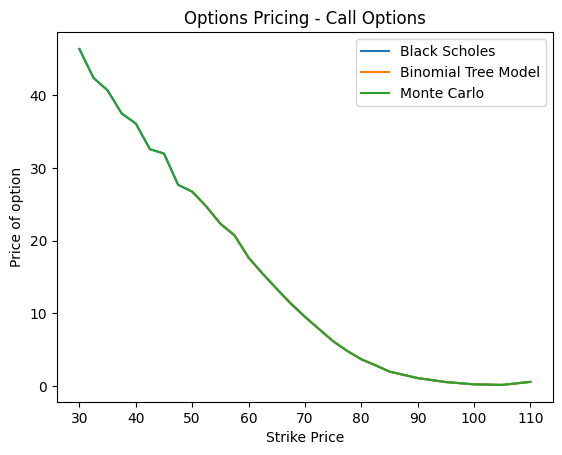

In [ ]:
#Plotting and comparing results

import matplotlib.pyplot as plt

plt.plot(X, Y1, label = "Black Scholes")
plt.plot(X, Y3, label = "Binomial Tree Model")
plt.plot(X, Y2, label = "Monte Carlo")

plt.xlabel('Strike Price')
plt.ylabel('Price of option')
plt.title('Options Pricing - Call Options')
plt.legend()
plt.show()

In [ ]:
X_put = []
for i in range(len(put)):
    K = put.iloc[i]['strike']
    X_put.append(K)

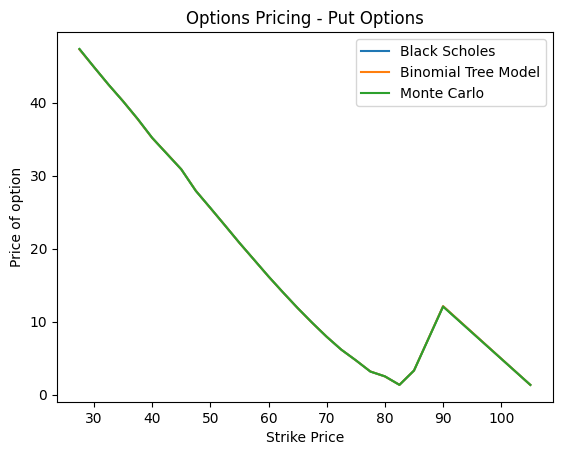

In [ ]:
#Plotting and comparing results

plt.plot(X_put, Y1_put, label = "Black Scholes")
plt.plot(X_put, Y3_put, label = "Binomial Tree Model")
plt.plot(X_put, Y2_put, label = "Monte Carlo")

plt.xlabel('Strike Price')
plt.ylabel('Price of option')
plt.title('Options Pricing - Put Options')
plt.legend()
plt.show()